# 01 - Simple ES Benchmark Function [![Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/RobertTLange/evosax/blob/main/examples/01_classic_benchmark.ipynb)

## Installation

You will need Python 3.10 or later, and a working JAX installation. For example, you can install JAX on NVIDIA GPU with:

In [ ]:
%pip install -U "jax[cuda]"

Then, install `evosax` from PyPi:

In [ ]:
%pip install -U "evosax[examples]"

## 2D Rosenbrock with CMA-ES

`evosax` implements a set of different classic benchmark functions. These include multi-dimensional versions of `quadratic`, `rosenbrock`, `ackley`, `griewank`, `rastrigin`, `schwefel`, `himmelblau`, `six-hump`. In the following we focus on the 2D Rosenbrock case, but feel free to play around with the others.

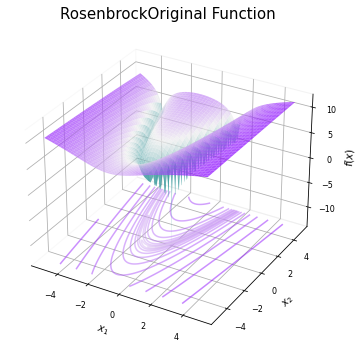

In [6]:
import jax
from evosax import CMA_ES
from evosax.problems import BBOBProblem

# Instantiate the problem
rosenbrock = BBOBProblem("RosenbrockOriginal", num_dims=2, seed_id=2)
rosenbrock.visualize(plot_log_fn=True)

In [4]:
# Instantiate the search strategy
rng = jax.random.key(0)
strategy = CMA_ES(population_size=20, num_dims=2, elite_ratio=0.5)
es_params = strategy.default_params.replace(init_min=-2, init_max=2)

state = strategy.init(rng, es_params)

# Run ask-eval-tell loop - NOTE: By default minimization
for t in range(50):
    rng, rng_gen, rng_eval = jax.random.split(rng, 3)
    x, state = strategy.ask(rng_gen, state, es_params)
    fitness = rosenbrock.eval(rng_eval, x)
    state = strategy.tell(x, fitness, state, es_params)

    if (t + 1) % 10 == 0:
        print(
            f"CMA-ES - # Gen: {t + 1}|Fitness: {state.best_fitness:.5f}|Params: {state.best_member}"
        )

CMA-ES - # Gen: 10|Fitness: 0.11798|Params: [-0.24922156 -0.45996755]
CMA-ES - # Gen: 20|Fitness: 0.06408|Params: [-0.25254983 -0.44303334]
CMA-ES - # Gen: 30|Fitness: 0.00020|Params: [-0.00756136 -0.01385564]
CMA-ES - # Gen: 40|Fitness: 0.00000|Params: [-0.00087966 -0.00171674]
CMA-ES - # Gen: 50|Fitness: 0.00000|Params: [-3.9389306e-06 -8.1345934e-06]


## 2D Rosenbrock with Other ES

In [4]:
from evosax import Strategies

rng = jax.random.key(0)

for s_name in [
    "SimpleES",
    "SimpleGA",
    "PSO",
    "DE",
    "Sep_CMA_ES",
    "Full_iAMaLGaM",
    "Indep_iAMaLGaM",
    "MA_ES",
    "LM_MA_ES",
    "RmES",
    "GLD",
    "SimAnneal",
    "GESMR_GA",
    "SAMR_GA",
]:
    strategy = Strategies[s_name](population_size=20, num_dims=2)
    es_params = strategy.default_params
    es_params = es_params.replace(init_min=-2, init_max=2)
    state = strategy.init(rng, es_params)

    for t in range(30):
        rng, rng_gen, rng_eval = jax.random.split(rng, 3)
        x, state = strategy.ask(rng_gen, state, es_params)
        fitness = rosenbrock.eval(rng_eval, x)
        state = strategy.tell(x, fitness, state, es_params)

        if (t + 1) % 5 == 0:
            print(
                f"{s_name} - # Gen: {t + 1}|Fitness: {state.best_fitness:.2f}|Params: {state.best_member}"
            )
    print(20 * "=")

SimpleES - # Gen: 5|Fitness: 2.41|Params: [0.5749427 1.3363407]
SimpleES - # Gen: 10|Fitness: 0.05|Params: [-0.02394086 -0.06951416]
SimpleES - # Gen: 15|Fitness: 0.02|Params: [0.052019   0.11855024]
SimpleES - # Gen: 20|Fitness: 0.02|Params: [0.052019   0.11855024]
SimpleES - # Gen: 25|Fitness: 0.02|Params: [0.052019   0.11855024]
SimpleES - # Gen: 30|Fitness: 0.02|Params: [0.052019   0.11855024]
SimpleGA - # Gen: 5|Fitness: 0.05|Params: [-0.23124489 -0.40957353]
SimpleGA - # Gen: 10|Fitness: 0.03|Params: [-0.13031456 -0.23322381]
SimpleGA - # Gen: 15|Fitness: 0.02|Params: [-0.11532619 -0.20849138]
SimpleGA - # Gen: 20|Fitness: 0.00|Params: [-0.00291448 -0.00076399]
SimpleGA - # Gen: 25|Fitness: 0.00|Params: [-0.00291448 -0.00076399]
SimpleGA - # Gen: 30|Fitness: 0.00|Params: [0.0479427  0.09704389]
PSO - # Gen: 5|Fitness: 0.32|Params: [-0.01428866  0.02790421]
PSO - # Gen: 10|Fitness: 0.19|Params: [-0.32952115 -0.5220759 ]
PSO - # Gen: 15|Fitness: 0.12|Params: [-0.33950207 -0.5610803

# Try out one of the many `evosax` algorithms!

In [5]:
Strategies.keys()

dict_keys(['SimpleGA', 'SimpleES', 'CMA_ES', 'DE', 'PSO', 'OpenES', 'PGPE', 'PBT', 'PersistentES', 'ARS', 'Sep_CMA_ES', 'BIPOP_CMA_ES', 'IPOP_CMA_ES', 'Full_iAMaLGaM', 'Indep_iAMaLGaM', 'MA_ES', 'LM_MA_ES', 'RmES', 'GLD', 'SimAnneal', 'SNES', 'xNES', 'ESMC', 'DES', 'SAMR_GA', 'GESMR_GA', 'GuidedES', 'ASEBO', 'CR_FM_NES', 'MR15_GA'])